<header><h1>Election Terms</h1><p>
<font face="Segoe WP" size="1">By Andrew Gladden<br>
November 15, 2016<br>
Big Data
</font></header>
<body>
<font face="Segoe WP" size="3">For this project, I chose to look at phrases commonly used by the presidential nominees Donald Drumpf and Hillary Clinton in the three presidential debates on October 4th, 9th, and 19th. In this program, I examine the phrases (phrases being anywhere from 3 to 5 words strung together) commonly used by each nominee, and calculated the percentage of the commonality of those phrases. The central question I explored was "What phrases did they use the most, and what does that show about each nominee?" In addition in seperate code, I also examined the total size of each nominee's vernacular, looked at what were the most common words used by each excluding stopwords, and how many unique phrases there were per candidate.</font>
</body>

How many times should a phrase come up for it to be popular?: 6
Show everything?: no
How many entries would you like to compare?: 15

Ratio for Clinton: ('about what we', 1.8475750577367205)
Ratio for Clinton: ('when i was', 2.0785219399538106)
Ratio for Clinton: ("we've got to", 2.0785219399538106)
Ratio for Clinton: ('to make sure', 2.3094688221709005)
Ratio for Clinton: ('want us to', 2.3094688221709005)
Ratio for Clinton: ('be able to', 2.5404157043879905)
Ratio for Clinton: ('the kind of', 2.771362586605081)
Ratio for Clinton: ('i think that', 2.771362586605081)
Ratio for Clinton: ('one of the', 3.0023094688221708)
Ratio for Clinton: ('and i think', 3.233256351039261)
Ratio for Clinton: ("we're going to", 3.695150115473441)
Ratio for Clinton: ('i want to', 3.695150115473441)
Ratio for Clinton: ('we need to', 3.695150115473441)
Ratio for Clinton: ('we have to', 4.387990762124711)
Ratio for Clinton: ('a lot of', 7.390300230946882)

Ratio for Drumpf: ('have to do', 1.9704433497536946

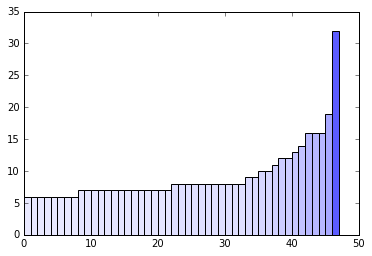

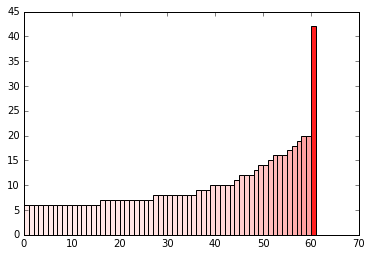

In [7]:
import statistics as st
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import operator
import sys
import math
import re
from collections import Counter
% matplotlib inline

stopfile = open("stopwords.txt", "r");
with open("prez.txt", "r", errors="ignore") as f:
    SCRPT = f.read();

stopwords = [];
sparse = [];
cntn = {};
drmp = {};
speaker = "";
debug = "f";
top = 0;
top2 = 0;

def nu_uh ():
    tryagain = input("Try again: ");
    try:
        top = int(tryagain);
    except:
        nu_uh();
def nu_uh2 ():
    tryagain = input("You think you're funny don't you. ");
    try:
        top2 = int(tryagain);
    except:
        nu_uh2();

inp = input("How many times should a phrase come up for it to be popular?: ");
inp2 = input("Show everything?: ");
inp3 = input("How many entries would you like to compare?: ");
check = inp2.lower();
try:
    top = int(inp);
    if top <= 0:
        nu_uh();
except:
    nu_uh();
try:
    top2 = int(inp3);
    if top2 <= 0:
        nu_uh2();
except:
    nu_uh2();

for a in stopfile:
    a = a.replace("\n", "");
    stopwords.append(a);

SCRPT = re.split(r'[-?!.,\n]', SCRPT);

print();

for line in SCRPT:
    sparse.append(line);

for a in range(len(sparse)):
    sparse[a] = sparse[a].split(" ");

for ab in range(len(sparse)):
    ac = 0;
    while ac < len(sparse[ab]):
        tmp = sparse[ab][ac];
        tmp = tmp.lower();
        sparse[ab][ac] = tmp;
        ac+=1;

while [''] in sparse:
    sparse.remove(['']);

bb = 0;
bc = 0;
bd = 0;
be = 0;

for b in range(len(sparse)):
    bb = 0;
    while bb < len(sparse[b]):
        if sparse[b][bb] == "clinton:":
            speaker = "c";
        elif sparse[b][bb] == "drumpf:" or sparse[b][bb] == "drumpf:":
            speaker = "d";
        elif sparse[b][bb] == "raddatz:" or sparse[b][bb] == "cooper:" or sparse[b][bb] == "holt:" or sparse[b][bb] == "wallace:" or sparse[b][bb] == "lester:":
            speaker = "null";
        try:
            temp = sparse[b][bb+1]+" "+sparse[b][bb+2]+" "+sparse[b][bb+3];
            temp2 = sparse[b][bb+1]+" "+sparse[b][bb+2]+" "+sparse[b][bb+3]+" "+sparse[b][bb+4];
            temp3 = sparse[b][bb+1]+" "+sparse[b][bb+2]+" "+sparse[b][bb+3]+" "+sparse[b][bb+4]+" "+sparse[b][bb+5];
        except:
            temp = "null";
            temp2 = "null";
            temp3 = "null"
        if speaker == "d":
            if temp not in drmp:
                drmp[temp] = 1;
            else:
                drmp[temp]+=1;
            if temp2 not in drmp:
                drmp[temp2] = 1;
            else:
                drmp[temp2]+=1;
            if temp3 not in drmp:
                drmp[temp3] = 1;
            else:
                drmp[temp3]+=1;
        elif speaker == "c":
            if temp not in cntn:
                cntn[temp] = 1;
            else:
                cntn[temp]+=1;
            if temp2 not in cntn:
                cntn[temp2] = 1;
            else:
                cntn[temp2]+=1;
            if temp3 not in cntn:
                cntn[temp3] = 1;
            else:
                cntn[temp3]+=1;
        bc+=1;
        bb+=1;

scnt = {};
sdmp = {};
for ca in cntn:
    if cntn[ca]>=top:
        scnt[ca] = cntn[ca];
for cb in drmp:
    if drmp[cb]>=top:
        sdmp[cb] = drmp[cb];

del scnt["null"];
del sdmp["null"];


differences = 0;
similarities = {};

phrase = 0;
for phrase in sdmp:
    temp = sdmp[phrase];
    for phrase2 in scnt:
        temp2 = scnt[phrase2];
        if phrase == phrase2 and phrase not in similarities:
            similarities[temp] = 0;
            add = int(sdmp[phrase]+scnt[phrase2]);
            similarities[temp] = add;

scnt = sorted(scnt.items(), key=operator.itemgetter(1));
sdmp = sorted(sdmp.items(), key=operator.itemgetter(1));

count = 0;

sTotal = 0;
sRatio = {};
dTotal = 0;
dRatio = {};

for phrs in scnt:
    sTotal+=int(phrs[1]);
for phrs in scnt:
    sRatio[phrs[0]] = (phrs[1]/sTotal)*100;
for phrs in sdmp:
    dTotal+=int(phrs[1]);
i = 0;
for phrs in sdmp:
    dRatio[phrs[0]] = (phrs[1]/dTotal)*100;

sRatio = sorted(sRatio.items(), key=operator.itemgetter(1));
dRatio = sorted(dRatio.items(), key=operator.itemgetter(1));

if check == "true" or check == "yes" or check == "yeah":
    print("Drumpf:", sdmp);
    print();
    print("Clinton:", scnt);
    print();
    print("Length of Clinton:", len(sRatio));
    print("Length of Drumpf:", len(dRatio));
    print();
    debug = "t";
    
cPop = 0.0;
dPop = 0.0;
try:
    for num in sRatio:
        if i < len(sRatio)-top2:
            worthless = 10;
        else:
            print("Ratio for Clinton:", num);
            cPop+=num[1];
        i+=1;
except:
    nu_uh2();
i = 0;
print();
try:
    for num in dRatio:
        if i < len(dRatio)-top2:
            worthless = 10;
        else:
            print("Ratio for Drumpf:", num);
            dPop+=num[1];
        i+=1;
except:
    nu_uh2();

print();
print("Percentage of phrases analyzed for Clinton with current popularity limit:",cPop);
print("Percentage of phrases analyzed for Drumpf with current popularity limit:",dPop);
print();

colr = np.random.rand(3);
for thing in scnt:
    colr[0] = 1.0;
    colr[1] = 1.0;
    colr[2] = 1.0
    height = int(thing[1]);
    colr[0] = 1-(height**1.199)/100;
    colr[1] = 1-(height**1.199)/100;
    #if debug == "t":
    #    print("Clinton: ", colr[1]);
    cGraph = plt.figure(1);
    plt.bar(count, height, 1, color = colr);
    count+=1;

print();
count = 0;
previous = 0.0;
dhList = [0.0];
llen = 0;
for thing in sdmp:
    height = int(thing[1]);
    colr[1] = 1.0;
    colr[2] = 1.0;
    colr[0] = 1.0;
    colr[1] = 1-(height**1.199)/100;
    colr[2] = 1-(height**1.199)/100;
    #if debug == "t":
    #    print("Drumpf: ", colr[1]);
    dGraph = plt.figure(2);
    plt.bar(count, height, 1+llen, color = colr);
    count+=1;

How many times should a word come up for it to be popular?: 19
Drumpf: [('better', 19), ('leaving', 19), ('let', 19), ('happened', 20), ('campaign', 20), ('last', 20), ('made', 20), ('000', 20), ("you're", 20), ('saying', 21), ('trade', 21), ('need', 21), ("she's", 21), ('united', 22), ('big', 22), ('percent', 22), ('don’t', 22), ('something', 22), ('talk', 23), ('\xad\xad', 23), ('even', 23), ('first', 23), ('wants', 23), ('bring', 23), ('new', 25), ('tremendous', 25), ('world', 25), ('tax', 25), ('time', 25), ('taxes', 26), ("can't", 26), ('us', 26), ('i’m', 27), ('done', 27), ('deal', 27), ('disaster', 28), ('could', 28), ('make', 28), ('got', 28), ('never', 29), ('russia', 29), ('ever', 29), ('states', 29), ('companies', 29), ('secretary', 30), ('good', 31), ('see', 32), ('right', 32), ('lot', 32), ('she’s', 33), ('back', 33), ('we’re', 34), ('money', 34), ('believe', 34), ('jobs', 34), ('president', 35), ('obama', 35), ('thing', 35), ('much', 37), ('really', 37), ('isis', 39), ('t

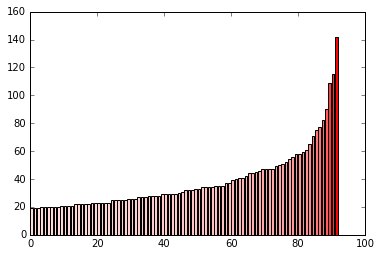

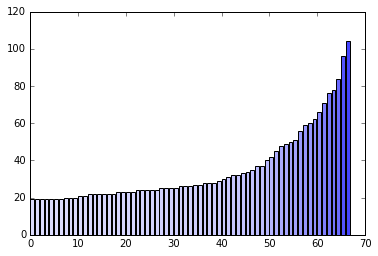

In [11]:
def nu_uh3 ():
    tryagain3 = input("Try again smartass: ");
    try:
        top3 = int(tryagain3);
    except:
        nu_uh3();

inp4 = input("How many times should a word come up for it to be popular?: ");
try:
    top3 = int(inp4);
    if top <= 0:
        nu_uh3();
except:
    nu_uh3();
#print(stopwords);
da = 0;
db = 0;
cntn2 = {};
drmp2 = {};
cn = "";#Comparison Name
while da < len(sparse):
    db = 0;
    while db < len(sparse[da]):
        if sparse[da][db] == "clinton:":
            cn = "cln";
        elif sparse[da][db] == "drumpf:" or sparse[da][db] == "drumpf:":
            cn = "dmp";
        elif sparse[da][db] == "raddatz:" or sparse[da][db] == "cooper:" or sparse[da][db] == "holt:" or sparse[da][db] == "wallace:" or sparse[da][db] == "lester:":
            cn = "null"
        if cn == "cln" and sparse[da][db] not in cntn2:
            cntn2[sparse[da][db]] = 1;
        elif cn == "cln" and sparse[da][db] in cntn2:
            cntn2[sparse[da][db]]+=1;
        if cn == "dmp" and sparse[da][db] not in drmp2:
            drmp2[sparse[da][db]] = 1;
        elif cn == "dmp" and sparse[da][db] in drmp2:
            drmp2[sparse[da][db]]+=1;
        db+=1;
    da+=1;
while '' in drmp2:
    del drmp2[''];
    #del drmp2['...'];
while '' in cntn2:
    del cntn2[''];
    #del cntn2['...'];
    
clearl1 = [];
clearl2 = [];
for clear1 in drmp2:
    if drmp2[clear1] < top3:
        clearl1.append(clear1);

for clear2 in cntn2:
    if cntn2[clear2] < top3:
        clearl2.append(clear2);

ea = 0;
eb = 0;
while ea < len(clearl1):
    del drmp2[clearl1[ea]];
    ea+=1;
while eb < len(clearl2):
    del cntn2[clearl2[eb]];
    eb+=1;
aa = 0;
while aa in range(len(stopwords)):
    try:
        del drmp2[stopwords[aa]];
        del cntn2[stopwords[aa]];
    except:
        bghg = 0;
    aa+=1;
del drmp2["drumpf:"];
del cntn2["clinton:"];
cntn2 = sorted(cntn2.items(), key=operator.itemgetter(1));
drmp2 = sorted(drmp2.items(), key=operator.itemgetter(1));
print("Drumpf:",drmp2);
print();
print("Clinton:", cntn2);

colr1 = [1.0, 1.0, 1.0];
colr2 = [1.0, 1.0, 1.0];

x1 = 0;
for point in drmp2:
    y = point[1];
    dGraph = plt.figure(3);
    colr1[1] = 1-((y*0.7)/100);
    colr1[2] = 1-((y*0.7)/100);
    plt.bar(x1, y, color=colr1);
    x1+=1;
x1 = 0;
for point in cntn2:
    y = point[1];
    cGraph = plt.figure(4);
    colr2[1] = 1-((y*0.7)/100);
    colr2[0] = 1-((y*0.7)/100);
    plt.bar(x1, y, color=colr2);
    x1+=1;

<header>
<h1>Conclusion</h1><p>
</header>
<body>
<font face="Segoe WP" size="3">One limitation of my study was that while being able to calculate the weight of each phrase, I was unable to analyze what the phrase means in the context of the situation. What I mean by this is that I was unable to determine whether the phrase was overall positive or negative. This would have allowed me to determine whether the candidate was sending an overall positive or negative message.
<br>One strength of my study was use of weighted percentages. This is where I took each number of phrases for each candidate, and get a percentage of how popular a phrase was compared to other ones. It also allows for the weight of phrases to be compared with the opposing candidate phrase weight.
<br>The overall answer for my question is that the analysis shows that Drumpf talked a lot more than Clinton. We can see this because Drumpf's graph always has more variety on it, and the value for his top phrase is much higher than Clinton's.
</font></body>